In [2]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - categorical_accuracy: 0.6327 - loss: 0.9888 - val_categorical_accuracy: 0.7858 - val_loss: 0.5995
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - categorical_accuracy: 0.7601 - loss: 0.6410 - val_categorical_accuracy: 0.7856 - val_loss: 0.5467
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - categorical_accuracy: 0.7785 - loss: 0.5905 - val_categorical_accuracy: 0.8070 - val_loss: 0.5149
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - categorical_accuracy: 0.7922 - loss: 0.5532 - val_categorical_accuracy: 0.8206 - val_loss: 0.4826
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - categorical_accuracy: 0.7991 - loss: 0.5345 - val_categorical_accuracy: 0.8023 - val_loss: 0.5020
313/313 - 0s - 911us/step - categorical_accuracy: 0.8023 - loss: 0.5020
Точность на тестовых данных: 0.802299976348877


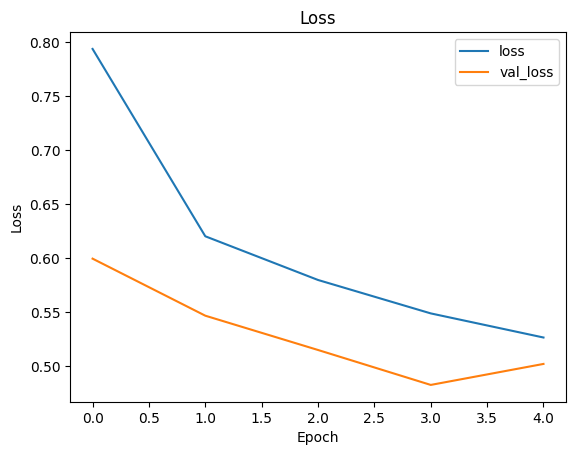

In [11]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

for drop_out in [0.1]:
    model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),

    tf.keras.layers.Dense(10, activation='softmax')
])
    model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

    history = model.fit(
    datagen.flow(train_images.reshape(-1, 28, 28, 1), train_labels, batch_size=64),
    epochs=5,  
    validation_data=(test_images.reshape(-1, 28, 28, 1), test_labels), 
    callbacks=[early_stopping]
)
    test_loss, test_acc = model.evaluate(test_images.reshape(-1, 28, 28, 1), test_labels, verbose=2)
    print(f"Точность на тестовых данных: {test_acc}")

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [54]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000, 10), (10000, 28, 28), (10000, 10))

In [3]:
model.summary()

NameError: name 'model' is not defined